In [1]:
# 아래의 라이브러리를 사용하므로 미리 임포트해 두기 바랍니다.
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
data18 = pd.read_excel('hn18_all.xlsx')

In [3]:
data19 = pd.read_excel('hn19_all.xlsx')

In [4]:
data18.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,HEI_TVEG,HEI_VEG,HEI_PROTF,HEI_DAIRY,HEI_SFA,HEI_NA,HEI_SWEET,HEI_CHO,HEI_FAT,HEI_EN
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,1.367163,0.775022,5.800000,0.0,5.273475,10.000000,10.0,5.000000,5.000000,0.000000
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,4.881043,1.641812,10.000000,10.0,10.000000,3.418798,10.0,4.345249,2.956568,5.000000
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,3.367648,4.943629,4.849725,10.0,0.000000,9.806158,10.0,5.000000,5.000000,5.000000
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,4.619405,0.437024,1.951565,0.0,10.000000,8.029505,10.0,0.000000,0.000000,1.244134


In [5]:
data19.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,2021.02.26.,A501215301,A5012153,2019,1,1,1,A501,1,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021.02.26.,A501215303,A5012153,2019,1,1,1,A501,1,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.02.26.,A501220401,A5012204,2019,1,1,1,A501,1,53,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
3,2021.02.26.,A501220402,A5012204,2019,1,1,1,A501,2,50,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0
4,2021.02.26.,A501220403,A5012204,2019,1,1,1,A501,1,16,...,3.0,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0


In [67]:
data=pd.concat([data18,data19])
data.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.09.01.,A901021302,A9010213,2018,1,1,2,A901,2,75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.09.01.,A901022601,A9010226,2018,1,1,2,A901,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


스트레스를 거의 느끼지 않는 다고 답한 nondata를 만든다. stress를 느낀다고 대답한 데이터와 숫자를 비슷하게 맞추기 위해 스트레스를 느낀다고 대답한 데이터는 19년 데이터만을 스트레스를 느끼지 않는다고 대답한 데이터는 19,18년 데이터를 가져왔다.

In [68]:
stress_map={
    1.0:'stress',
    2.0:'stress',
    4.0:'non_stress'
}

In [69]:
data['stress']=data['BP1'].map(stress_map)

In [70]:
nondata=data[data['BP1']==4.0]

In [71]:
len(nondata)

2298

In [72]:
nondata.head(5) # 스트레스를 느끼지 않는 2019년 2018년 데이터

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
0,2020.09.01.,A901020501,A9010205,2018,1,1,2,A901,1,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
1,2020.09.01.,A901021301,A9010213,2018,1,1,2,A901,1,78,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
4,2020.09.01.,A901023303,A9010233,2018,1,1,2,A901,2,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
5,2020.09.01.,A901023304,A9010233,2018,1,1,2,A901,2,71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress
30,2020.09.01.,A901029003,A9010290,2018,1,1,2,A901,2,70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non_stress


19데이터에서 1,2를 응답한 것만 스트레스 데이터에 포함함.

In [73]:
stress_map={
    1.0:'stress',
    2.0:'stress',
    4.0:'non_stress'
}

In [74]:
data19['stress']=data19['BP1'].map(stress_map)

In [75]:
stdata=data19[data19['stress']=='stress']

In [76]:
stdata.head() # 스트레스를 느끼는 2019년 데이터

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G,stress
14,2021.02.26.,A501240801,A5012408,2019,1,1,1,A501,2,44,...,3.0,3.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,stress
26,2021.02.26.,A501308802,A5013088,2019,1,1,1,A501,1,32,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,0.0,1.0,stress
30,2021.02.26.,A501317301,A5013173,2019,1,1,1,A501,2,54,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,stress
31,2021.02.26.,A501317302,A5013173,2019,1,1,1,A501,2,22,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,1.0,1.0,stress
35,2021.02.26.,A501324102,A5013241,2019,1,1,1,A501,2,78,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,2.0,stress


In [77]:
len(stdata)

1759

In [104]:
total_data=pd.concat([nondata,stdata]) # 두개의 데이터를 합침

## 1-1.고혈압과 스트레스의 상관관계

In [143]:
total_data.DI1_dg.replace(8.0,np.NaN,inplace=True)
total_data.DI1_dg.replace(9.0,np.NaN,inplace=True)

In [144]:
df1=total_data.groupby('stress').mean()[['DI1_dg']]
df1.columns=['고혈압비율']
df1

,고혈압비율
stress,
non_stress,0.362918
stress,0.213852


Text(0.5, 1.0, '고혈압 비율 비교')

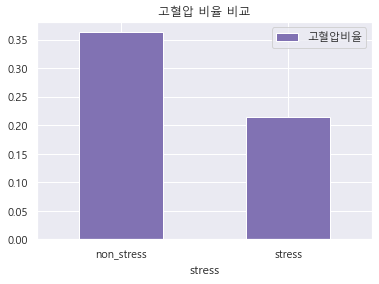

In [145]:
df1.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('고혈압 비율 비교')

## 1-2.당뇨병과 스트레스의 상관관계

In [82]:
df2=total_data.groupby('stress').mean()[['HE_DMdg']]
df2.columns=['당뇨병비율']
df2

,당뇨병비율
stress,
non_stress,0.127937
stress,0.081865


Text(0.5, 1.0, '당뇨병 비율 비교')

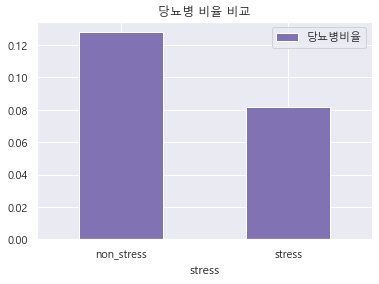

In [83]:
df2.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('당뇨병 비율 비교')

## 1-3. 우울증과 스트레스의 상관관계

In [120]:
total_data['DF2_dg'].replace(8.0,np.NaN,inplace=True)
total_data['DF2_dg'].replace(9.0,np.NaN,inplace=True)

In [121]:
df3=total_data.groupby('stress').mean()[['DF2_dg']]
df3.columns=['우울증비율']
df3

,우울증비율
stress,
non_stress,0.025728
stress,0.080769


Text(0.5, 1.0, '우울증 비율 비교')

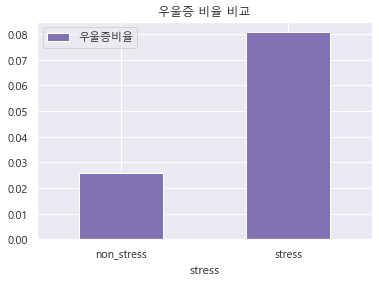

In [122]:
df3.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('우울증 비율 비교')

## 1-4.심근경색증 또는 협심증과 스트레스의 상관관계

In [107]:
total_data.DI5_dg.replace(8.0,np.NaN,inplace=True)
total_data.DI5_dg.replace(9.0,np.NaN,inplace=True)

In [109]:
df4=total_data.groupby('stress').mean()[['DI5_dg']]
df4.columns=['심근경색증,협심증비율']
df4

,"심근경색증,협심증비율"
stress,
non_stress,0.017459
stress,0.008974


Text(0.5, 1.0, '심근경색증 또는 협심증 비율 비교')

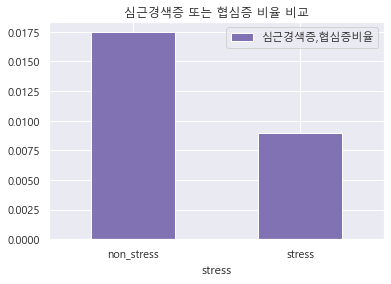

In [110]:
df4.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('심근경색증 또는 협심증 비율 비교')

## 1-5. 갑상선질환과 스트레스의 상관관계

In [52]:
total_data.DE2_dg.replace(8.0,np.NaN,inplace=True)
total_data.DE2_dg.replace(9.0,np.NaN,inplace=True)

In [53]:
df6=total_data.groupby('stress').mean()[['DE2_dg']]
df6.columns=['갑상선질환비율']
df6 

,갑상선질환비율
stress,
non_stress,0.033495
stress,0.037796


Text(0.5, 1.0, '갑상선질환 비율 비교')

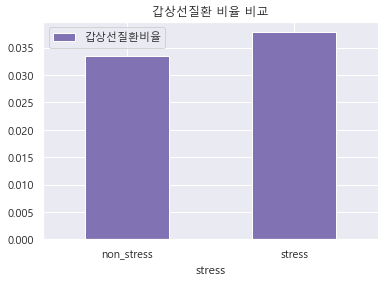

In [54]:
df6.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('갑상선질환 비율 비교')

## 1-6.중이염과 스트레스의 상관관계

In [115]:
total_data.DH4_dg.replace(9.0,np.NaN,inplace=True)

In [117]:
df7=total_data.groupby('stress').mean()[['DH4_dg']]
df7.columns=['중이염비율']
df7 

,중이염비율
stress,
non_stress,0.056210
stress,0.076555


Text(0.5, 1.0, '중이염 비율 비교')

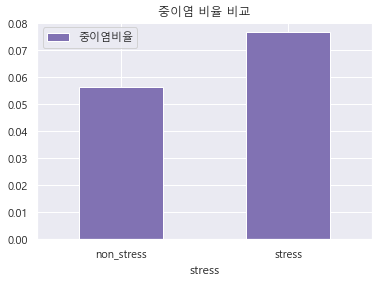

In [118]:
df7.plot(kind='bar',color='m')
plt.xticks(rotation=0)
plt.title('중이염 비율 비교')

## 1-7.스트레스가 가장 많은 집단의 데이터셋을 따로 만들어 우울증 비율 비교

In [123]:
high=total_data[total_data['BP1']==1]
high.DF2_dg.mean()

0.111

In [124]:
df3 # 1-3번에서 도출한 우울증 데이터프레임. 한칸 위의 high와 비교해보면 high쪽이 근소하게 높음을 알수있다.

,우울증비율
stress,
non_stress,0.025728
stress,0.080769


Text(0.5, 1.0, '우울증 비교')

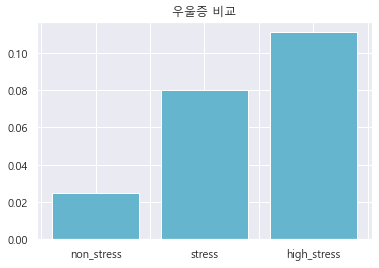

In [125]:
plt.bar([1,2,3],[0.025,0.080,0.111], color='c')
plt.xticks([0.5,1,1.5,2.0,2.5,3.0,3.5],['','non_stress','','stress','','high_stress'])
plt.title('우울증 비교')

스트레스가 더 높은 집단이 근소하지만 높은 우울증비율을 나타내는 경향이 있다.

## 1-8.스트레스가 가장 많은 집단의 데이터셋을 따로 만들어 고혈압 비율 비교

In [146]:
high.DI1_dg.mean()

0.742

In [147]:
df1 # 1-4번에서 도출한 심근경색,협심증 데이터프레임. 한칸위의 high와 비교해보면 high쪽의 비율이 더 높음을 알수있다.

,고혈압비율
stress,
non_stress,0.362918
stress,0.213852


Text(0.5, 1.0, '고혈압비율 비교')

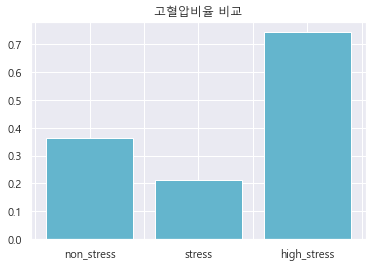

In [149]:
plt.bar([1,2,3],[0.363,0.214,0.742],color='c')
plt.xticks([0.5,1,1.5,2.0,2.5,3.0,3.5],['','non_stress','','stress','','high_stress'])
plt.title('고혈압비율 비교')

스트레스가 매우높은 집단이 고혈압 비율이 더 높다고 나타난다.

---

대체로 스트레스있는 경우와 없는 경우에서 질병발병 유무는 큰 차이가 없는 것으로 나타났다.
이러한 결과가 나온이유로 표본이 작았기 때문일 수도있고 다른 요인이 더욱 강하게 작용한것일 수도 있으며 스트레스 지수라는 것이 따로 있는 것이 아니라 본인 스스로 스트레스 정도를 인지해서 설문에 응하는 것이였기에 스스로의 상태를 파악하지 못했을 수도 있었을 수도 있겠다고 생각한다. 혹은 스트레스를 인지하더라도 어떻게 대처하느냐에 따라 달라질 수 있기에 이러한 결과가 나온것이라 추측한다. 
하지만 우울증의 경우는 상대적으로 스트레스 지수와 연관되는 경향을 나타내었다.

## 2-1. 세대별 스트레스비율 비교

In [129]:
age_bins=[total_data.age.min()-1,20,30,40,50,60,70,80,total_data.age.max()+1]
group_name=['10대','20대','30대','40대','50대','60대','70대','80대']
age_cut_data=pd.cut(total_data.age,age_bins, labels=group_name,right=False)
total_data['generation']=age_cut_data

In [132]:
df1=total_data.groupby('generation').mean()[['mh_stress']]

Text(0.5, 1.0, '세대별 스트레스 비율')

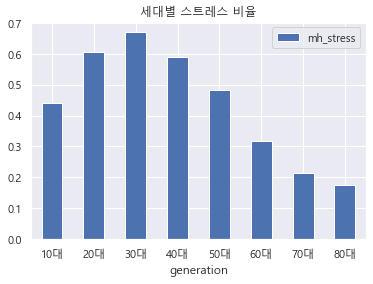

In [133]:
df1.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('세대별 스트레스 비율')

## 2-2. 성별별 스트레스 비율비교

In [134]:
total_data['sex2']=np.where(total_data.sex==1, '남성',' 여성')

In [135]:
df9=total_data.groupby('sex2').mean()[['mh_stress']]

Text(0.5, 1.0, '성별별 스트레스 비율')

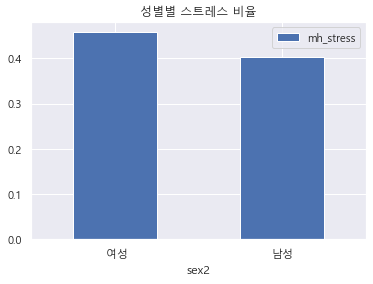

In [136]:
df9.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('성별별 스트레스 비율')

## 2-3. 성별과 세대를 통틀어서 스트레스 비율비교

In [138]:
data_male=total_data[total_data['sex']==1]
data_female=total_data[total_data['sex']==2]

In [139]:
df2=data_male.groupby('generation').mean()[['mh_stress']]
df3=data_female.groupby('generation').mean()[['mh_stress']]

Text(0.5, 1.0, '성별과 세대에 따른 스트레스 비율')

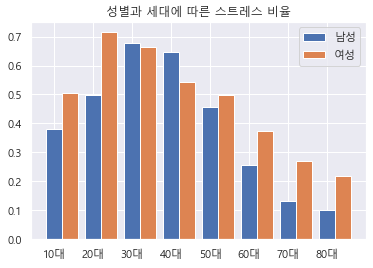

In [140]:
w=0.4
index=np.arange(len(df2.mh_stress))
plt.bar(index,df2.mh_stress,label='남성',width=w, align = 'center')
plt.bar(index+w,df3.mh_stress,label='여성',width=w, align = 'center')
plt.legend(loc = 'best')
plt.xticks([0,1,2,3,4,5,6,7],['10대','20대','30대','40대','50대','60대','70대','80대'])
plt.title('성별과 세대에 따른 스트레스 비율')